In [12]:
!pip install -Uqq fastbook
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [13]:
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [7]:
# alvin's GoogleDrive path

cur_path = Path('/content/drive/MyDrive/emotion-detection/data/train')

Mounted at /content/drive


In [5]:
# resize the image into 48x48
pic = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items = get_image_files, 
    get_y = parent_label,
    item_tfms = Resize(48),
    batch_tfms = aug_transforms(size=224))

In [6]:
# data loading & resizing
data = pic.dataloaders(path)

In [ ]:
dataTrain = data.train_ds.items[:-1]
dataValid = data.valid_ds.items[:-1]

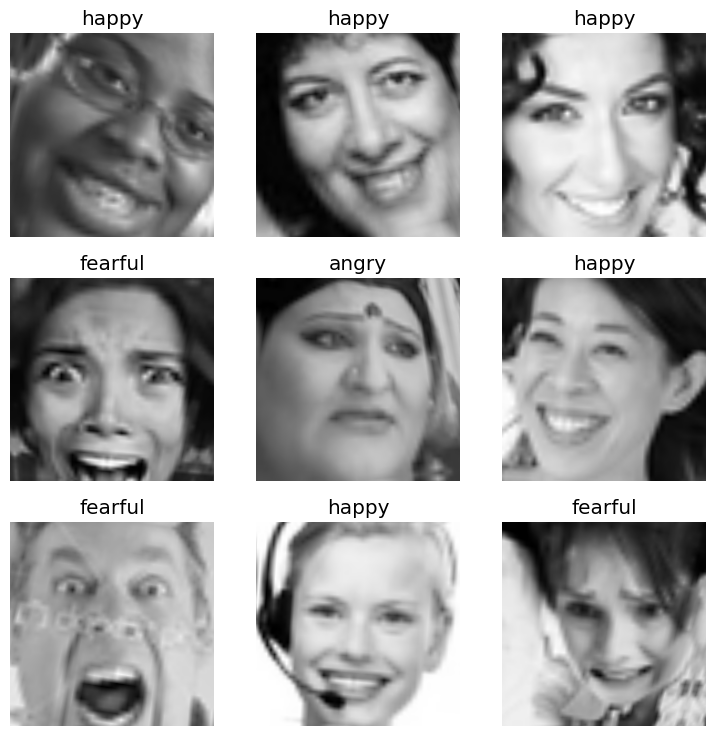

In [ ]:
data.show_batch()

In [ ]:
residualNet = cnn_learner(data, models.resnet50, metrics = error_rate)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0030199517495930195)

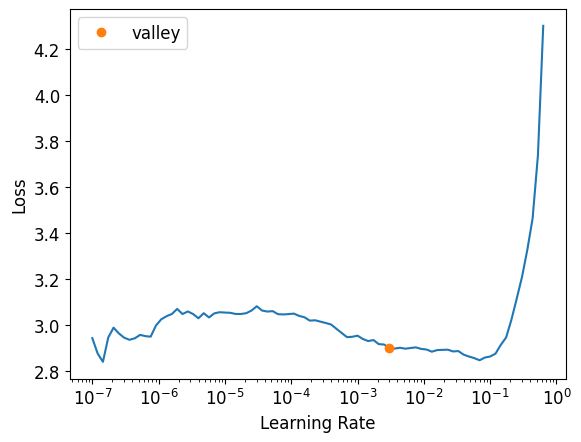

In [ ]:
residualNet.lr_find()

In [ ]:
residualNet.fine_tune(8, 0.003)

epoch,train_loss,valid_loss,error_rate,time
0,1.621796,1.404368,0.541033,21:25


epoch,train_loss,valid_loss,error_rate,time
0,1.138509,1.040102,0.396710,00:45
1,1.051538,0.975314,0.369296,00:45
2,0.986748,0.946501,0.355854,00:45
3,0.901235,0.927903,0.348956,00:45
4,0.789456,0.857083,0.324903,00:45
5,0.669809,0.842950,0.303679,00:45
6,0.559456,0.857262,0.297489,00:45
7,0.499345,0.870062,0.301380,00:45


In [ ]:
interp = Interpretation.from_learner(residualNet)

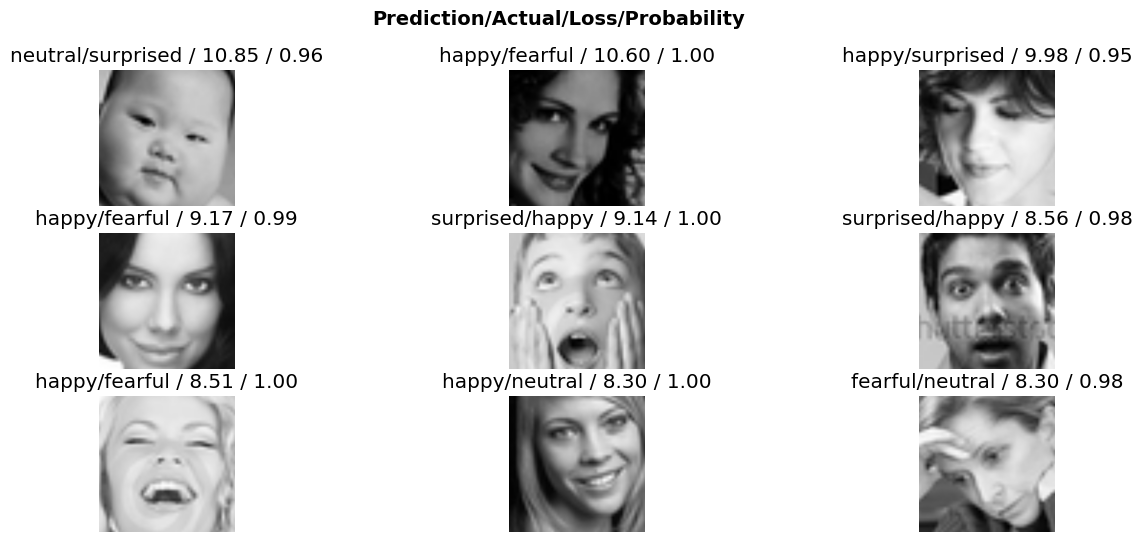

In [ ]:
interp.plot_top_losses(9, figsize = (15,6))

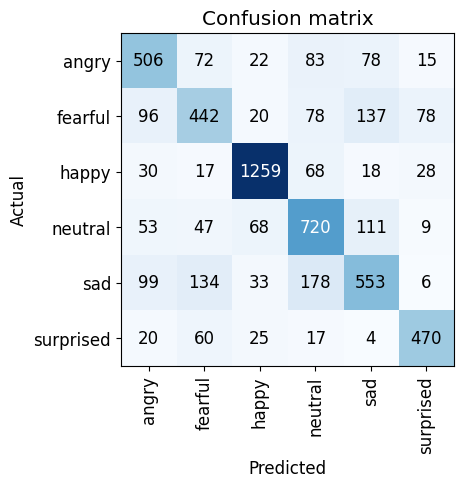

In [ ]:
interp_class = ClassificationInterpretation.from_learner(residualNet)
interp_class.plot_confusion_matrix()

In [ ]:
residualNet.export("residualNet-50.pkl")